# <span style="font-size: 32px; font-weight: bold; color: #2c3e50;">Table of Contents</span>

---

1. **[Data Overview](#Data-Overview)**  
   - [Basic Information](#Basic-Information)  
   - [Statistical Summary](#Statistical-Summary)  
   - [Missing Values Check](#Missing-Values-Check)  
   - [Duplicate Rows Check](#Duplicate-Rows-Check)

2. **[Data Visualization](#Data-Visualization)**  

3. **[Data Preprocessing](#Data-Preprocessing)**  
   - [Handling Categorical Variables](#Handling-Categorical-Variables)  
   - [Encoding Categorical Variables](#Encoding-Categorical-Variables)  
   - [Handling Numerical Features](#Handling-Numerical-Features)  


---


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



In [3]:
data = pd.read_csv('/home/doaa/programming/ML/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Data Overview

### Basic Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Statistical Summary

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
data.describe(include='object').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


### Missing Values Check

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Duplicate Rows Check

In [8]:
data.duplicated().sum()

0

In [9]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
data.drop(columns=['name','last_review','id','host_id','reviews_per_month'],inplace=True)
data

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


## Data Visualization

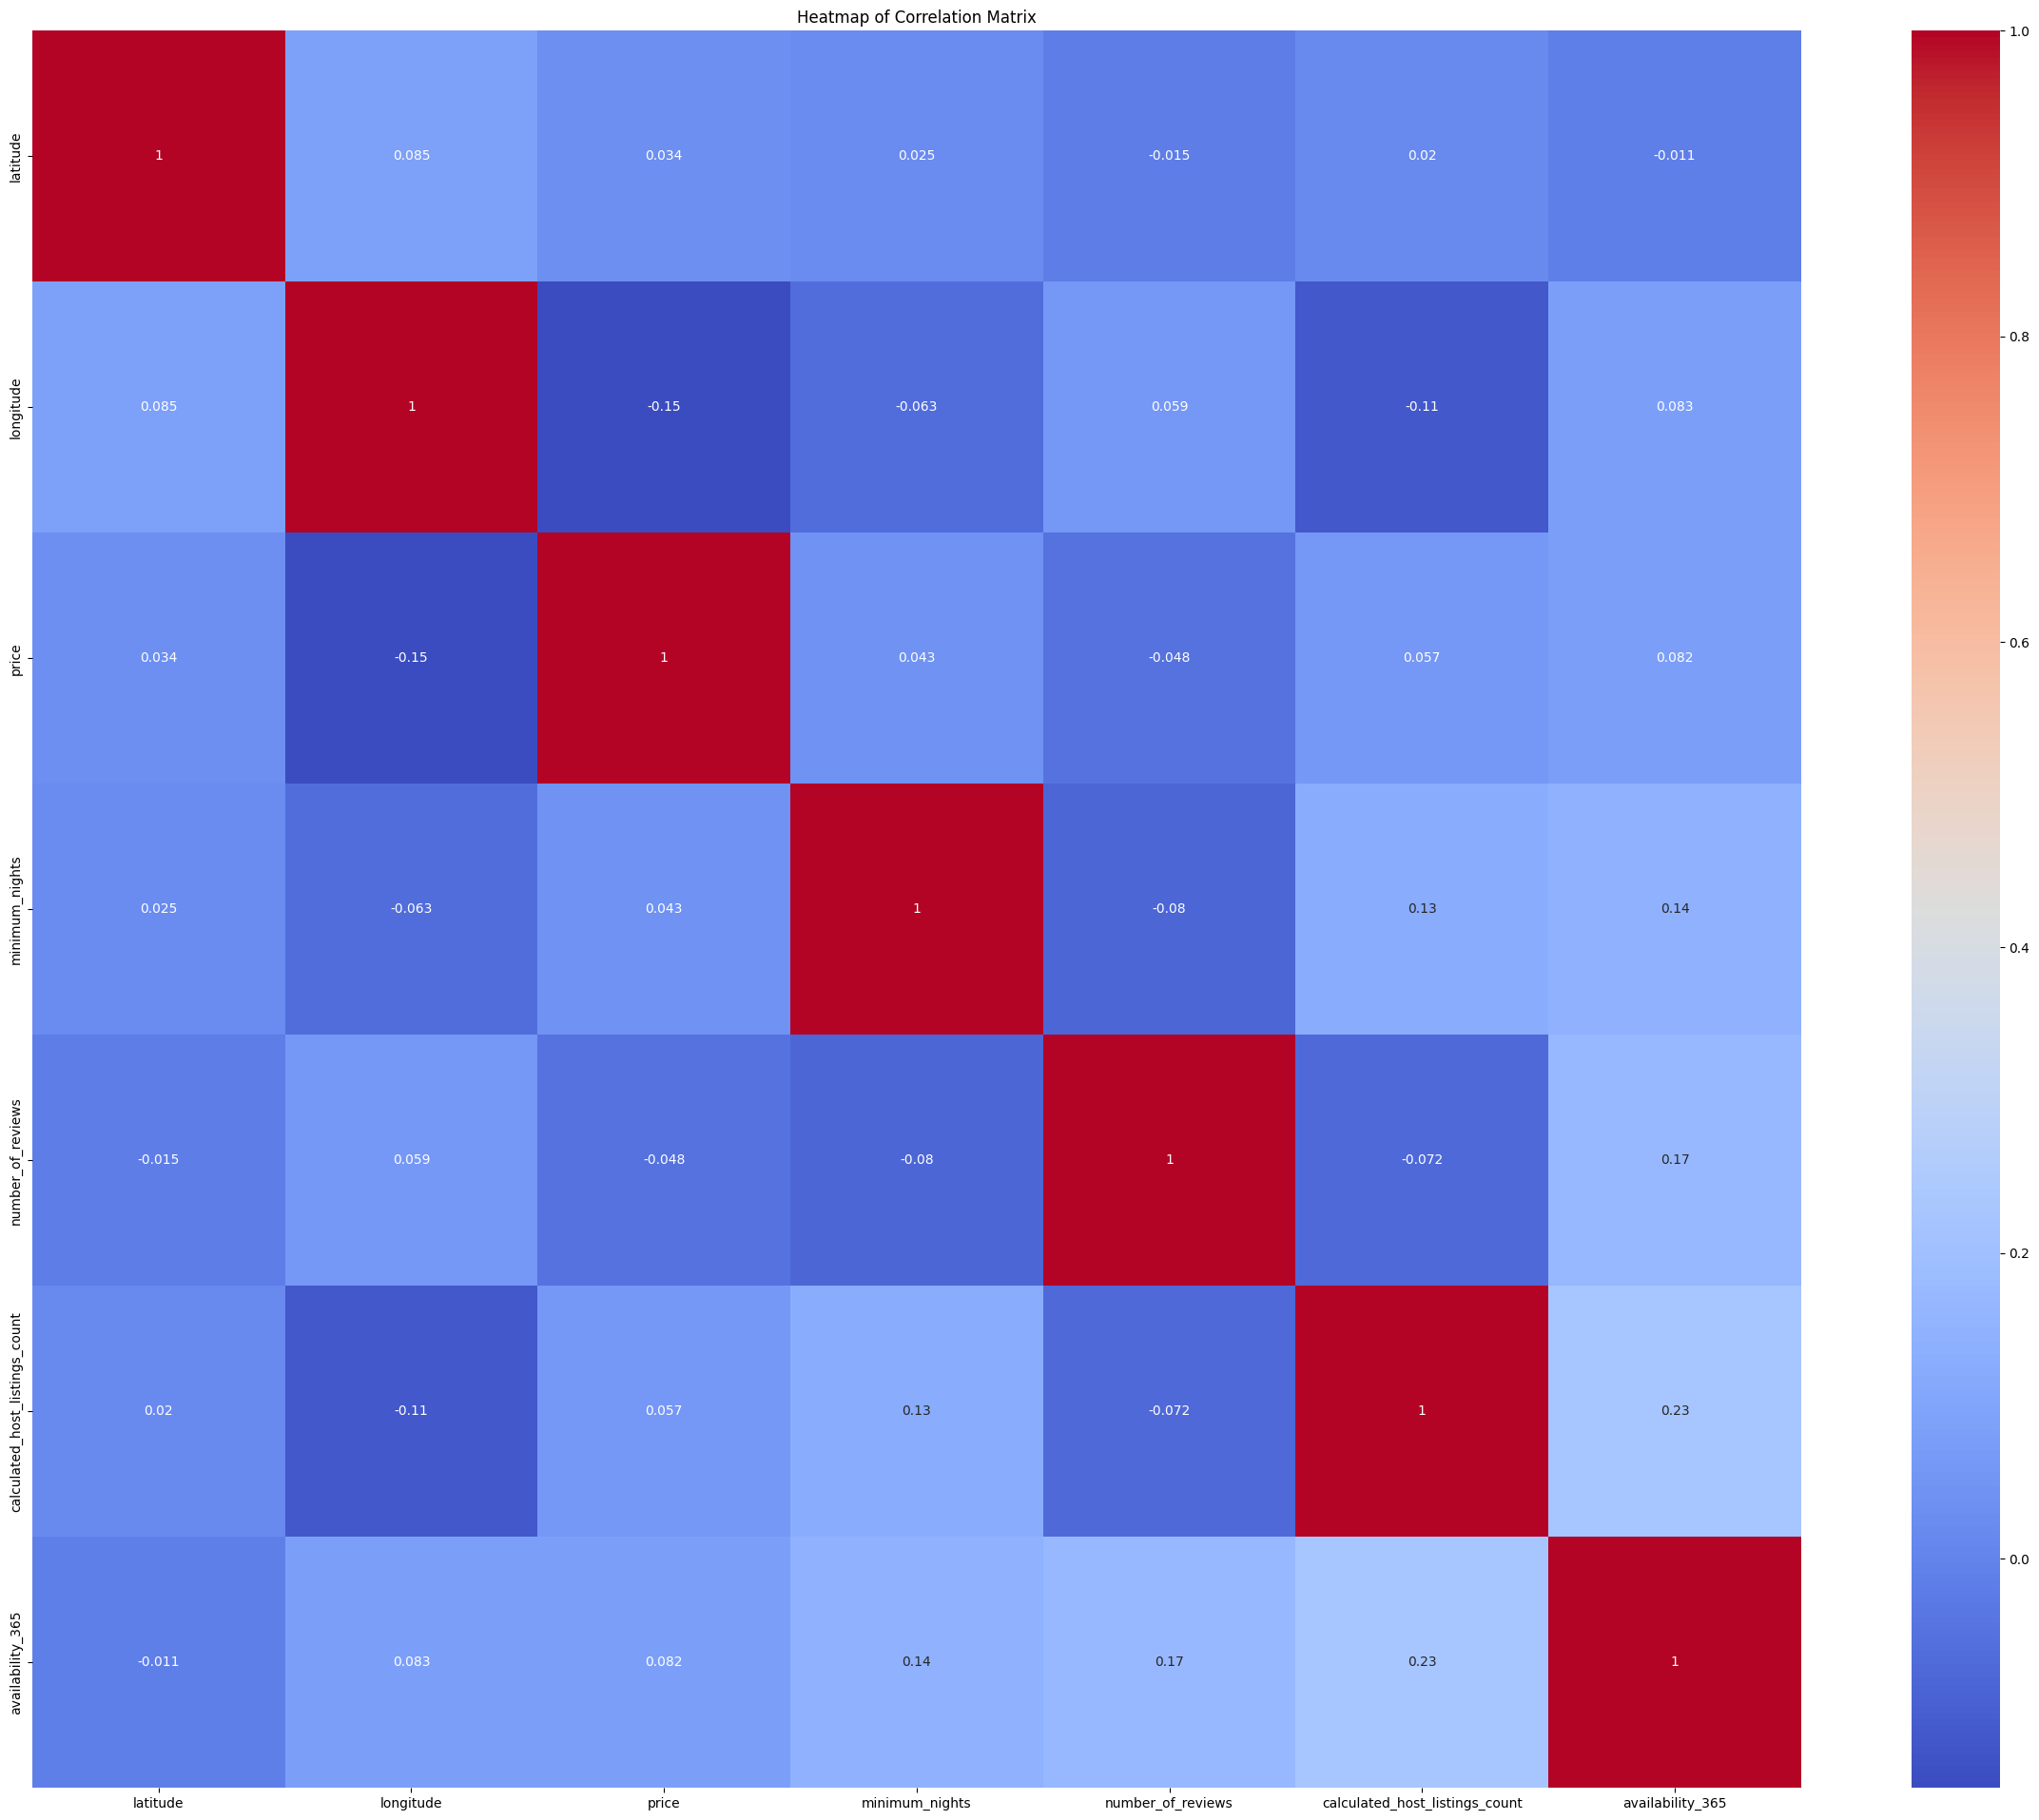

In [11]:
numerical_data = data.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

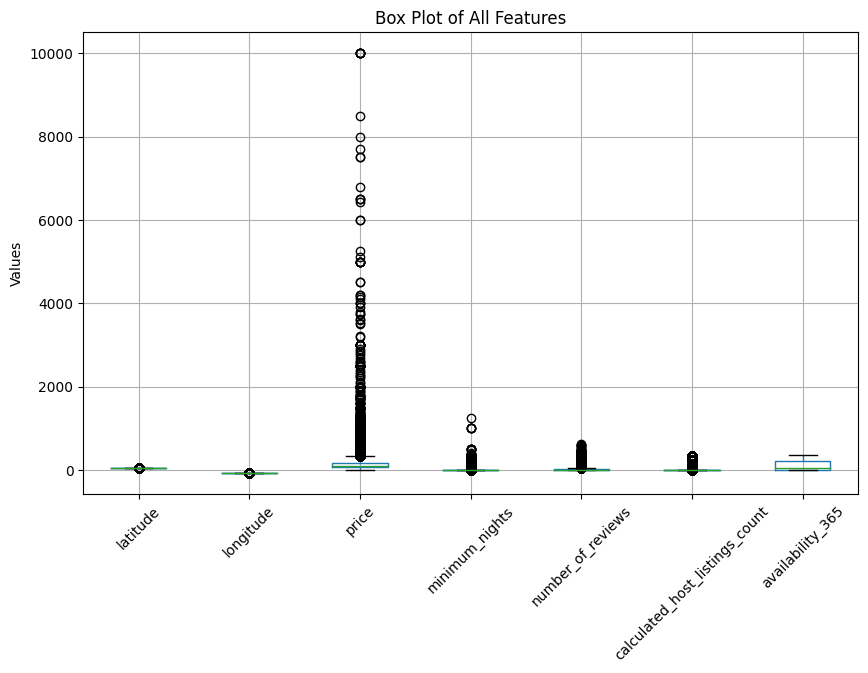

In [12]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

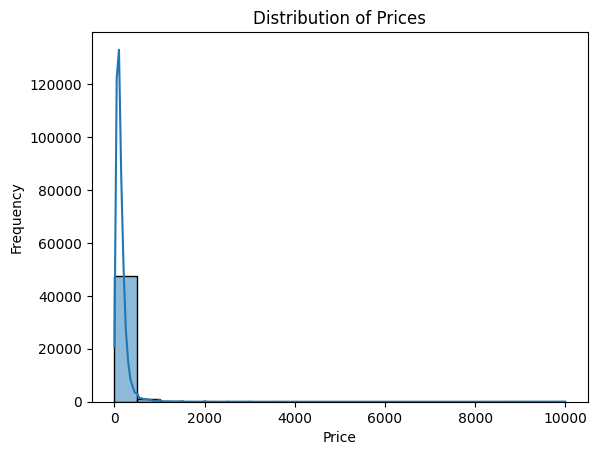

In [13]:
sns.histplot(data=data, x='price', bins=20, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [14]:
c = ['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count']
for i in c:
    data[i] = np.log1p(data[i])


/home/doaa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


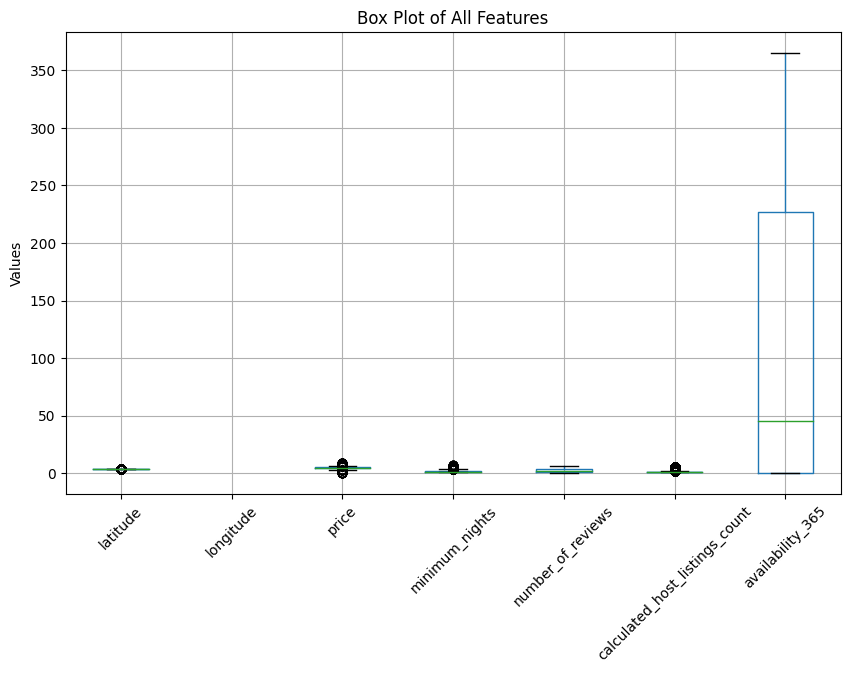

In [15]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

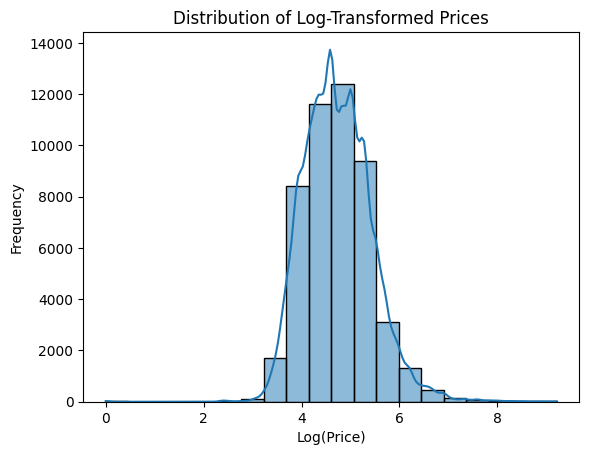

In [16]:

sns.histplot(data=data, x='price', bins=20, kde=True)
plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()


In [17]:
data['host_name'] = data['host_name'].fillna(data['host_name'].mode())

In [18]:
label = LabelEncoder()

data['neighbourhood'] = label.fit_transform(data['neighbourhood'])
data['host_name'] = label.fit_transform(data['host_name'])

In [19]:
encode = ['neighbourhood_group','room_type']
data = pd.get_dummies(data, columns=encode,dtype='int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_name                          48895 non-null  int64  
 1   neighbourhood                      48895 non-null  int64  
 2   latitude                           48895 non-null  float64
 3   longitude                          0 non-null      float64
 4   price                              48895 non-null  float64
 5   minimum_nights                     48895 non-null  float64
 6   number_of_reviews                  48895 non-null  float64
 7   calculated_host_listings_count     48895 non-null  float64
 8   availability_365                   48895 non-null  int64  
 9   neighbourhood_group_Bronx          48895 non-null  int64  
 10  neighbourhood_group_Brooklyn       48895 non-null  int64  
 11  neighbourhood_group_Manhattan      48895 non-null  int

In [21]:
data.drop(columns='longitude',inplace=True)

In [22]:
skewness = data.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew())
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 host_name                             0.057993
neighbourhood                         0.256005
latitude                              0.233064
price                                 0.553105
minimum_nights                        1.498510
number_of_reviews                     0.362924
calculated_host_listings_count        3.279837
availability_365                      0.763408
neighbourhood_group_Bronx             6.468545
neighbourhood_group_Brooklyn          0.361088
neighbourhood_group_Manhattan         0.229460
neighbourhood_group_Queens            2.400202
neighbourhood_group_Staten Island    11.318186
room_type_Entire home/apt            -0.078722
room_type_Private room                0.174218
room_type_Shared room                 6.259199
dtype: float64


In [24]:
highly_skewed = [
    "minimum_nights", "calculated_host_listings_count", "neighbourhood_group_Bronx", 
    "neighbourhood_group_Queens", "neighbourhood_group_Staten Island", 
    "room_type_Shared room"
]

for col in highly_skewed:
    data[col] = np.log1p(data[col])

new_skewness = data[highly_skewed].apply(lambda x: x.skew())
print("Skewness after transformation:\n", new_skewness)


Skewness after transformation:
 minimum_nights                        0.565463
calculated_host_listings_count        1.901089
neighbourhood_group_Bronx             6.468545
neighbourhood_group_Queens            2.400202
neighbourhood_group_Staten Island    11.318186
room_type_Shared room                 6.259199
dtype: float64


In [25]:
x = data.drop(columns='price',axis=1)
y = data[['price']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True,test_size=0.3,random_state=42)

In [27]:
x_scalar = MinMaxScaler()
y_scalar = MinMaxScaler()

x_train_scalar = x_scalar.fit_transform(x_train)
x_test_scalar = x_scalar.transform(x_test)

y_train_scalar = y_scalar.fit_transform(y_train)
y_test_scalar = y_scalar.transform(y_test)

In [28]:
model = LinearRegression()
model.fit(x_train_scalar,y_train_scalar)

LinearRegression()

In [29]:
y_pred = model.predict(x_test_scalar)

In [30]:
model.score(x_train_scalar,y_train_scalar)

0.4872063028743605

In [31]:
r2 = r2_score(y_test_scalar,y_pred)
r2

0.496324082882608

In [32]:
train_preds = model.predict(x_train_scalar)
test_preds = model.predict(x_test_scalar)


train_mse = mean_squared_error(y_train_scalar, train_preds, squared=False)
test_mse = mean_squared_error(y_test_scalar, test_preds, squared=False)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

print("\n=======================================\n")


train_mae = mean_absolute_error(y_train_scalar, train_preds)
test_mae = mean_absolute_error(y_test_scalar, test_preds)
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")


print("\n=======================================\n")


train_r2 = r2_score(y_train_scalar, train_preds)
test_r2 = r2_score(y_test_scalar, test_preds)
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Training MSE: 0.05432034562480265
Test MSE: 0.052972992738068485


Training MAE: 0.03931382529949789
Test MAE: 0.0388821178697283


Training R-squared: 0.4872063028743605
Test R-squared: 0.496324082882608


In [33]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train_scalar)
X_test_poly = poly.transform(x_test_scalar)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train_scalar)

y_train_pred = model2.predict(X_train_poly)
y_test_pred = model2.predict(X_test_poly)




In [34]:
print(f"Degree: {degree}")
print("\n=======================================\n")

print(f"Train R²: {r2_score(y_train_scalar, y_train_pred)}")
print(f"Test R²: {r2_score(y_test_scalar, y_test_pred)}")
print("\n=======================================\n")

print(f"Train MSE: {mean_squared_error(y_train_scalar, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test_scalar, y_test_pred)}")
print("\n=======================================\n")

print(f"Train MAE: {mean_absolute_error(y_train_scalar, y_train_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test_scalar, y_test_pred)}")

Degree: 2


Train R²: 0.5444962945218131
Test R²: 0.554249243374753


Train MSE: 0.002621043838810067
Test MSE: 0.0024834185558394125


Train MAE: 0.0364919046133062
Test MAE: 0.03600429610087863
